# Course 1: Classification and Vector Spaces
# Week 1: Logistic Regression for Sentiment Analysis of Tweets

## Lecture 1

In this lab, we will be exploring how to preprocess tweets for sentiment analysis. We will provide a function for preprocessing tweets during this week's assignment, but it is still good to know what is going on under the hood. By the end of this lecture, you will see how to use the NLTK package to perform a preprocessing pipeline for Twitter datasets.

## Setup

In [39]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import numpy as np

## About the Twitter dataset
The sample dataset from NLTK is separated into positive and negative tweets. It contains 5000 positive tweets and 5000 negative tweets exactly. The exact match between these classes is not a coincidence. The intention is to have a balanced dataset. That does not reflect the real distributions of positive and negative classes in live Twitter streams. It is just because balanced datasets simplify the design of most computational methods that are required for sentiment analysis. However, it is better to be aware that this balance of classes is artificial.

The dataset is already downloaded in the Coursera workspace. In a local computer however, you can download the data by doing:

In [40]:
# nltk.download('twitter_samples')

<class 'list'>
<class 'list'>
5000
5000


([<matplotlib.patches.Wedge at 0x1d870481208>,
 [Text(6.735557395310444e-17, 1.1, 'Positive'),
  Text(-2.0206672185931328e-16, -1.1, 'Negative')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

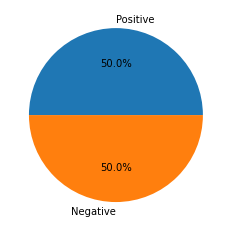

In [41]:
# Import the postive and negative tweets
pos_tweets = twitter_samples.strings('positive_tweets.json')
neg_tweets = twitter_samples.strings('negative_tweets.json')

print(type(pos_tweets))
print(type(neg_tweets))

print(len(pos_tweets))
print(len(neg_tweets))

# Print a pie chart of the positive and negative tweets
plt.pie([len(pos_tweets), len(neg_tweets)], labels=['Positive', 'Negative'], autopct='%1.1f%%')

In [42]:
# Get 5 random indexes from the positive and negative tweets and print the corresponding tweets
for i in range(5):
    print('\033[92m' + pos_tweets[np.random.randint(0, len(pos_tweets))])
for i in range(5):
    print('\033[91m' + neg_tweets[np.random.randint(0, len(neg_tweets))])

@zbeech That will be £15.90 for you  :-)
I love u. :p https://t.co/0zr3VlB5kL
@sweettoothmarti should keep you going for a few mins lol :-)))))
"Keep smiling because life is a beautiful thing and there is so much to smile about :)
I have many… https://t.co/h9gtZ0Y99u
@side556 Hey!  :)  Long time no talk...
Someone talk to me I'm boreddd :(
@KhaleesiMiley I want :(
cant believe I missed your follow spree today :( @AaronCarpenter
what do you mean :( http://t.co/xb7114NLDN
It's true... :-( http://t.co/G3gV2f73Bh


## Preprocessing

Essential steps for preprocessing a dataset are:
- Tokenization: Split a sentence into words.
- Lowercasing: Convert all characters to lowercase.
- Stopword and punctuation removal: Remove stopwords and punctuations.
- Stemming: Reduce words to their root form.

In [43]:
# nltk.download('stopwords')

In [44]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

def clean_string(text):
    """
    Returns a cleaned string
    """
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'#\S+', '', text)
    text = re.sub(r'^RT[\s]+', '', text)

    return text

def remove_stopwords_punctuation(tokens):
    """
    Returns a list of tokens from the text
    """
    stop_words = set(stopwords.words('english'))
    punctuation = set(string.punctuation)
    return [token for token in tokens if token not in stop_words and token not in punctuation]

def tokenize(text):
    """
    Returns a list of tokens from the text
    """
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    return tokenizer.tokenize(text)

def stem_tokens(tokens):
    """
    Returns a list of stemmed tokens
    """
    stemmer = PorterStemmer()
    return [stemmer.stem(token) for token in tokens]

def process_text(text, debug=False):
    """
    Returns a list of tokens from the text after cleaning, tokenizing, and stemming
    """
    text = clean_string(text)
    if debug:
        print(text)
    tokens = tokenize(text)
    if debug:
        print(tokens)
    tokens = remove_stopwords_punctuation(tokens)
    if debug:
        print(tokens)
    tokens = stem_tokens(tokens)
    if debug:
        print(tokens)
    return tokens


## Show the preprocessing pipeline

In [48]:
# For 5 positive and 5 negative tweets, print the processed text
print('\033[92m' + 'Positive tweets:')
for i in range(5):
    print(process_text(pos_tweets[i], True))
    print('---')
print('\033[91m' + 'Negative tweets:')
for i in range(5):
    print(process_text(neg_tweets[i], True))
    print('---')

Positive tweets:
 @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
['for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)']
['top', 'engaged', 'members', 'community', 'week', ':)']
['top', 'engag', 'member', 'commun', 'week', ':)']
['top', 'engag', 'member', 'commun', 'week', ':)']
---
@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!
['hey', 'james', '!', 'how', 'odd', ':/', 'please', 'call', 'our', 'contact', 'centre', 'on', '02392441234', 'and', 'we', 'will', 'be', 'able', 'to', 'assist', 'you', ':)', 'many', 'thanks', '!']
['hey', 'james', 'odd', ':/', 'please', 'call', 'contact', 'centre', '02392441234', 'able', 'assist', ':)', 'many', 'thanks']
['hey', 'jame', 'odd', ':/', 'pleas', 'call', 'contact', 'centr', '02392441234', 'abl', 'assist', ':)', 'mani', 'thank']
['hey', 'jame', 'odd', ':/', 'pleas', 'call', 'contact', '